### Table of Contents
3. [Loading Libraries and Reading Data](#3-loading-libraries-and-reading-data)<br>
    a. [Loading Libraries](#a-loading-libraries)<br>
    b. [Version of Installed Python Library](#b-version-of-installed-python-library)<br>
    c. [Loading Data](#c-loading-data)<br>

4. [Exploratory Data Analysis (EDA)](#4-exploratory-data-analysis-eda)<br>
    a. [Data Dimensionality](#a-data-dimensionality)<br>
    b. [Data Types](#b-data-types)<br>
    c. [Summary Statistics](#c-summary-statistics)<br>
    d. [Check for Missing Values](#d-check-for-missing-values)<br>
    e. [Explore Target Variable and Extract Important Features](#e-explore-target-variable-and-extract-important-features)<br>
    f. [Detect Outliers and Anomalies](#f-detect-outliers-and-anomalies)<br>
    g. [Explore Additional Predictor Variables](#g-explore-additional-predictor-variables)<br>
    
5. [Data Transformation and Preprocessing]()<br>
    a. [Data Transformation](#81)<br>
    &emsp;i. &nbsp;[Combining or Merging Predictor Features]()<br>
    &emsp;ii. [Combining ore Merging Levels of Discrete Predictor Features]()<br>
    
    b.[Data Preprocessing](#83)<br>
    &emsp;i.&ensp; [Removing Predictor Features with high 'Not Applicable' Values]()<br>
    &emsp;ii.&nbsp; [Removing Outliers]()<br>
    &emsp;iii. [Removing Imputation Flags]()<br>
    &emsp;iv.&nbsp;[Removing Duplicate Features]()<br>
    &emsp;v.&ensp;[One hot encoding]()<br>



<a id="3"></a>
### 3. Loading Libraries and Reading Data
<a id="31"></a>
#### a. Loading Libraries
Let's start by importing the libraries we need 

In [282]:
import pandas as pd
from pandas import set_option
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import scipy.stats

# from sklearn import model_selection, preprocessing, metrics
# from sklearn.metrics import mean_squared_error
# from pandas.plotting import scatter_matrix
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
# from pandas import get_dummies
# import lightgbm as lgb
# import xgboost as xgb
# import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

<a id="32"></a>
#### b. Version of Installed Python Library 

For the purpose of reproducibility of this analysis, displaying the versions of installed libraries

In [120]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))

matplotlib: 3.5.2
sklearn: 1.0.2
seaborn: 0.11.2
pandas: 1.3.5
numpy: 1.21.6


<a id="33"></a>
#### c. Loading Data

In [121]:
DATA_PATH = 'data'
FILE_NAME = 'recs2009_public.csv'
df = pd.read_csv(os.path.join(DATA_PATH, FILE_NAME), encoding = 'utf-8-sig')

<a id="4"></a>
### 4. Exploratory Data Analysis (EDA)

In the EDA phase, we will perform initial investigations on the dataset to check the following:
- data dimensionality (or shape) alongwith observing first few observations of the dataset
- data types (whether categorical or numerical)
- generate summary statistics
- missing values
- explore our target variable _'KWH'_ and its possible predictors from the dataset
- detect outliers and anomalies
- explore additional predictor variables

<a id="41"></a>
#### a. Data Dimensionality

Let's start by glancing first few observations of the RECS dataset alongwith its dimensionality

In [122]:
pd.options.display.max_columns = df.shape[1]
df.head()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,Climate_Region_Pub,AIA_Zone,METROMICRO,UR,KOWNRENT,CONDCOOP,YEARMADE,YEARMADERANGE,OCCUPYYRANGE,CONVERSION,ORIG1FAM,LOOKLIKE,NUMFLRS,NUMAPTS,WALLTYPE,ROOFTYPE,STUDIO,NAPTFLRS,STORIES,TYPEHUQ4,BEDROOMS,NCOMBATH,NHAFBATH,OTHROOMS,TOTROOMS,CELLAR,CRAWL,CONCRETE,BASEFIN,FINBASERMS,BASEHEAT,BASEHT2,PCTBSTHT,BASECOOL,BASECL2,PCTBSTCL,BASEUSE,ATTIC,ATTICFIN,FINATTRMS,ATTCHEAT,ATTCHT2,PCTATTHT,ATTCCOOL,ATTCCL2,PCTATTCL,ATTICUSE,PRKGPLC1,SIZEOFGARAGE,GARGLOC,GARGHEAT,GARGCOOL,PRKGPLC2,SIZEOFDETACH,OUTLET,ZKOWNRENT,ZCONDCOOP,ZYEARMADE,ZYEARMADERANGE,ZOCCUPYYRANGE,ZCONVERSION,ZORIG1FAM,ZLOOKLIKE,ZNUMFLRS,ZNUMAPTS,ZWALLTYPE,ZROOFTYPE,ZSTUDIO,ZNAPTFLRS,ZSTORIES,ZTYPEHUQ4,ZBEDROOMS,ZNCOMBATH,ZNHAFBATH,ZOTHROOMS,ZCELLAR,ZCRAWL,ZCONCRETE,ZBASEFIN,ZFINBASERMS,ZBASEHEAT,ZBASEHT2,ZPCTBSTHT,ZBASECOOL,ZBASECL2,ZPCTBSTCL,ZBASEUSE,ZATTIC,ZATTICFIN,ZFINATTRMS,ZATTCHEAT,ZATTCHT2,ZPCTATTHT,ZATTCCOOL,ZPCTATTCL,ZATTCCL2,ZATTICUSE,ZPRKGPLC1,ZSIZEOFGARAGE,ZGARGLOC,ZGARGHEAT,ZGARGCOOL,ZPRKGPLC2,ZSIZEOFDETACH,STOVEN,STOVENFUEL,STOVE,STOVEFUEL,OVEN,OVENFUEL,OVENUSE,OVENCLN,TYPECLN,MICRO,AMTMICRO,DEFROST,OUTGRILL,OUTGRILLFUEL,TOPGRILL,STGRILA,TOASTER,NUMMEAL,FUELFOOD,COFFEE,NUMFRIG,TYPERFR1,SIZRFRI1,REFRIGT1,ICE,AGERFRI1,ESFRIG,REPLCFRI,HELPFRI,HELPFRIY,TYPERFR2,SIZRFRI2,REFRIGT2,MONRFRI2,AGERFRI2,ESFRIG2,TYPERFR3,SIZRFRI3,REFRIGT3,MONRFRI3,AGERFRI3,ESFRIG3,SEPFREEZ,NUMFREEZ,UPRTFRZR,SIZFREEZ,FREEZER,AGEFRZR,REPLCFRZ,HELPFRZ,HELPFRZY,UPRTFRZR2,SIZFREEZ2,FREEZER2,AGEFRZR2,DISHWASH,DWASHUSE,AGEDW,ESDISHW,REPLCDW,HELPDW,HELPDWY,ZSTOVEN,ZSTOVENFUEL,ZSTOVE,ZSTOVEFUEL,ZOVEN,ZOVENFUEL,ZOVENUSE,ZOVENCLN,ZTYPECLN,ZMICRO,ZAMTMICRO,ZDEFROST,ZOUTGRILL,ZOUTGRILLFUEL,ZTOPGRILL,ZSTGRILA,ZTOASTER,ZNUMMEAL,ZFUELFOOD,ZCOFFEE,ZNUMFRIG,ZTYPERFR1,ZSIZRFRI1,ZREFRIGT1,ZICE,ZAGERFRI1,ZTYPERFR2,ZSIZRFRI2,ZREFRIGT2,ZMONRFRI2,ZAGERFRI2,ZTYPERFR3,ZSIZRFRI3,ZREFRIGT3,ZMONRFRI3,ZAGERFRI3,ZSEPFREEZ,ZNUMFREEZ,ZUPRTFRZR,ZSIZFREEZ,ZFREEZER,ZAGEFRZR,ZUPRTFRZR2,ZSIZFREEZ2,ZFREEZER2,ZAGEFRZR2,ZDISHWASH,ZDWASHUSE,ZAGEDW,CWASHER,TOPFRONT,WASHLOAD,WASHTEMP,RNSETEMP,AGECWASH,ESCWASH,REPLCCW,HELPCW,HELPCWY,DRYER,DRYRFUEL,DRYRUSE,AGECDRYER,TVCOLOR,TVSIZE1,TVTYPE1,CABLESAT1,COMBODVR1,DVR1,DIGITSTB1,PLAYSTA1,COMBOVCRDVD1,VCR1,DVD1,TVAUDIOSYS1,OTHERSTB1,TVONWD1,TVONWDWATCH1,TVONWE1,TVONWEWATCH1,TVSIZE2,TVTYPE2,CABLESAT2,COMBODVR2,DVR2,DIGITSTB2,PLAYSTA2,COMBOVCRDVD2,VCR2,DVD2,TVAUDIOSYS2,OTHERSTB2,TVONWD2,TVONWDWATCH2,TVONWE2,TVONWEWATCH2,TVSIZE3,TVTYPE3,CABLESAT3,COMBODVR3,DVR3,DIGITSTB3,PLAYSTA3,COMBOVCRDVD3,VCR3,DVD3,TVAUDIOSYS3,OTHERSTB3,TVONWD3,TVONWDWATCH3,TVONWE3,TVONWEWATCH3,COMPUTER,NUMPC,PCTYPE1,MONITOR1,TIMEON1,PCONOFF1,PCSLEEP1,PCTYPE2,MONITOR2,TIMEON2,PCONOFF2,PCSLEEP2,PCTYPE3,MONITOR3,TIMEON3,PCONOFF3,PCSLEEP3,INTERNET,INDIALUP,INDSL,INCABLE,INSATEL,INWIRELESS,PCPRINT,FAX,COPIER,WELLPUMP,DIPSTICK,SWAMPCOL,AQUARIUM,STEREO,NOCORD,ANSMACH,BATTOOLS,BATCHRG,CHRGPLGT,ELECDEV,ELECCHRG,CHRGPLGE,ZCWASHER,ZTOPFRONT,ZWASHLOAD,ZWASHTEMP,ZRNSETEMP,ZAGECWASH,ZDRYER,ZDRYRFUEL,ZDRYRUSE,ZAGECDRYER,ZTVCOLOR,ZTVSIZE1,ZTVTYPE1,ZCABLESAT1,ZCOMBODVR1,ZDVR1,ZDIGITSTB1,ZPLAYSTA1,ZCOMBOVCRDVD1,ZVCR1,ZDVD1,ZTVAUDIOSYS1,ZOTHERSTB1,ZTVONWD1,ZTVONWDWATCH1,ZTVONWE1,ZTVONWEWATCH1,ZTVSIZE2,ZTVTYPE2,ZCABLESAT2,ZCOMBODVR2,ZDVR2,ZDIGITSTB2,ZPLAYSTA2,ZCOMBOVCRDVD2,ZVCR2,ZDVD2,ZTVAUDIOSYS2,ZOTHERSTB2,ZTVONWD2,ZTVONWDWATCH2,ZTVONWE2,ZTVONWEWATCH2,ZTVSIZE3,ZTVTYPE3,ZCABLESAT3,ZCOMBODVR3,ZDVR3,ZDIGITSTB3,ZPLAYSTA3,ZCOMBOVCRDVD3,ZVCR3,ZDVD3,ZTVAUDIOSYS3,ZOTHERSTB3,ZTVONWD3,ZTVONWDWATCH3,ZTVONWE3,ZTVONWEWATCH3,ZCOMPUTER,ZNUMPC,ZPCTYPE1,ZMONITOR1,ZTIMEON1,ZPCONOFF1,ZPCSLEEP1,ZPCTYPE2,ZMONITOR2,ZTIMEON2,ZPCONOFF2,ZPCSLEEP2,ZPCTYPE3,ZMONITOR3,ZTIMEON3,ZPCONOFF3,ZPCSLEEP3,ZINTERNET,ZINDIALUP,ZINDSL,ZINCABLE,ZINSATEL,ZINWIRELESS,ZPCPRINT,ZFAX,ZCOPIER,ZWELLPUMP,ZDIPSTICK,ZSWAMPCOL,ZAQUARIUM,ZSTEREO,ZNOCORD,ZANSMACH,ZBATTOOLS,ZBATCHRG,ZCHRGPLGT,ZELECDEV,ZELECCHRG,ZCHRGPLGE,HEATHOME,DNTHEAT,EQUIPNOHEAT,FUELNOHEAT,EQUIPM,FUELHEAT,MAINTHT,EQUIPAGE,REPLCHT,HE

In [123]:
print(f"Shape of the dataset df_recs is {df.shape}")

Shape of the dataset df_recs is (12083, 940)


As can be seen above, RECS 2009 dataset consists of 12,083 observations and 940 features. Let's explore how many of these features are categorical vs numerical

<a id="42"></a>
#### b. Data Types

In [124]:
num_features = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(num_features))

cat_features = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(cat_features))

Number of Numerical features:  935
Number of Categorical features:  5


`df.info()` method prints a concise summary of a dataframe including count of index data type, number of columns. `df.describe()` method prints out the descriptive statistics including mean, median (i.e. Second Quartile, Q2 depicted by 50% in the summary table below), standard deviation, range, Q1 and Q3 quartile values. As can be seen below, RECS 2009 dataset consists of three different column data types:
- _float64_ data type with 50 columns
- _int64_ data type with 885 columns, and 
- _object_ data type with 5 columns

The count of column data types is consistent with the count of numerical and categorical features we calculated above. Count of Numerical features we calculated above is actually sum of number of _float64_ and _int64_ data type columns i.e. (50 + 885 = 935). 

The number of records, 12083 is consistent with what we found using `df.shape`. We don't have any NA values in the dataset.

In [129]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 940 entries, DOEID to DesignDBT1
dtypes: float64(50), int64(885), object(5)
memory usage: 86.7+ MB


<a id="43"></a>
#### c. Summary Statistics

In [131]:
df.describe()

DOEID       REGIONC      DIVISION  REPORTABLE_DOMAIN  \
count  12083.000000  12083.000000  12083.000000       12083.000000   
mean    6042.000000      2.628321      5.373086          14.783663   
std     3488.205986      1.042142      2.859366           8.195824   
min        1.000000      1.000000      1.000000           1.000000   
25%     3021.500000      2.000000      3.000000           8.000000   
50%     6042.000000      3.000000      5.000000          15.000000   
75%     9062.500000      3.000000      7.000000          21.000000   
max    12083.000000      4.000000     10.000000          27.000000   

            TYPEHUQ       NWEIGHT         HDD65         CDD65       HDD30YR  \
count  12083.000000  12083.000000  12083.000000  12083.000000  12083.000000   
mean       2.659604   9402.981870   4141.375238   1415.406108   4135.146983   
std        1.192627   5192.101419   2317.759375   1134.659475   2260.543686   
min        1.000000    476.100000      0.000000      0.000000      0.000000   
25%        2.000000   6297.040000   2197.500000    561.000000   2224.000000   
50%        2.000000   7970.630000   4483.000000   1045.000000   4502.000000   
75%        3.000000  11330.030000   5913.000000   1897.000000   5854.000000   
max        5.000000  95779.140000  12525.000000   5480.000000  13346.000000   

            CDD30YR  Climate_Region_Pub      AIA_Zone      KOWNRENT  \
count  12083.000000        12083.000000  12083.000000  12083.000000   
mean    1443.503104            2.601010      3.265000      1.338078   
std     1021.748722            1.349571      1.278652      0.497299   
min        0.000000            1.000000      1.000000      1.000000   
25%      712.000000            1.000000      2.000000      1.000000   
50%     1179.000000            3.000000      3.000000      1.000000   
75%     1842.500000            4.000000      4.000000      2.000000   
max     5357.000000            5.000000      5.000000      3.000000   

           CONDCOOP      YEARMADE  YEARMADERANGE  OCCUPYYRANGE    CONVERSION  \
count  12083.000000  12083.000000   12083.000000  12083.000000  12083.000000   
mean      -1.801457   1971.062402       4.027725      6.691964     -1.752793   
std        0.784550     24.817912       2.119578      1.535312      0.865886   
min       -2.000000   1920.000000       1.000000      1.000000     -2.000000   
25%       -2.000000   1955.000000       2.000000      6.000000     -2.000000   
50%       -2.000000   1975.000000       4.000000      7.000000     -2.000000   
75%       -2.000000   1991.000000       6.000000      8.000000     -2.000000   
max        2.000000   2009.000000       8.000000      8.000000      2.000000   

           ORIG1FAM      LOOKLIKE       NUMFLRS       NUMAPTS      WALLTYPE  \
count  12083.000000  12083.000000  12083.000000  12083.000000  12083.000000   
mean      -1.952164     -1.955640     -1.066705      4.486717      2.738889   
std        0.364856      0.386862      2.766326     29.662574      1.512821   
min       -2.000000     -2.000000     -2.000000     -2.000000      1.000000   
25%       -2.000000     -2.000000     -2.000000     -2.000000      2.000000   
50%       -2.000000     -2.000000     -2.000000     -2.000000      3.000000   
75%       -2.000000     -2.000000     -2.000000     -2.000000      3.000000   
max        1.000000      2.000000     35.000000    365.000000      9.000000   

           ROOFTYPE        STUDIO      NAPTFLRS       STORIES      TYPEHUQ4  \
count  12083.000000  12083.000000  12083.000000  12083.000000  12083.000000   
mean       3.676157     -1.510635     -1.269635     10.507738     -1.899694   
std        2.772088      0.890336      1.323690      8.779010      0.472066   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%        2.000000     -2.000000     -2.000000     10.000000     -2.000000   
50%        5.000000     -2.000000     -2.000000     10.000000     -2.000000   
75%        5.000000     -2.000000     -2.0000

**Key Observations:**
- Mean value is different (i.e. more or less) than median value for columns HDD65, CDD65, HDD30YR, CDD30YR, TOTSQFT, KWH, CDD80, OA_LAT
- Large difference in 75th percentile and maximum value for columns HDD65, CDD65, HDD30YR, CDD30YR, TOTSQFT, KWH, CDD80, OA_LAT
- Thus, these observations mean that there are outier values in our dataset

Now, let's check the summary statistics for categorical features

In [133]:
df.describe(include=['object'])

,METROMICRO,UR,NOCRCASH,NKRGALNC,IECC_Climate_Pub
count,12083,12083,12083,12083,12083
unique,3,2,29,21,11
top,METRO,U,-2,-2,4A
freq,10302,9656,9958,9958,2703


In the table above, we can see the number of unique values as well as the top value and it's frequency for all the categorical features. Upon closely looking at features 'NOCRCASH' and 'NKRGALNC', we can observe that the topmost value is -2 with a frequency of 9,958 in each of these features. This doesn't seem right as -2 is of _int64_ data type and we previously found these features to be categorical in nature. Hence we will now check the counts of unique values for each of these features to see if there was any data entry error

In [127]:
df['NOCRCASH'].value_counts()

-2    9958
-2    2028
1       18
3       10
4       10
5        9
2        7
1        6
16       4
12       3
8        3
6        3
4        2
.        2
3        2
24       2
12       2
15       2
55       2
10       1
20       1
40       1
55       1
28       1
6        1
24       1
10       1
20       1
25       1
Name: NOCRCASH, dtype: int64

In [128]:
df['NKRGALNC'].value_counts()

-2    9958
-2    2028
5       42
3       11
1       10
10       8
5        5
10       5
1        2
.        2
15       2
8        1
3        1
2        1
77       1
30       1
15       1
8        1
55       1
2        1
20       1
Name: NKRGALNC, dtype: int64

We can observe from the above value counts for features 'NOCRCASH' and 'NKRGALNC' that there is '.' (period symbol) in two observations for each of these features. We assume that these two observations with '.' value might be a data error while recording and saving the data. 

In addition, it can be noticed that the value '-2' appears twice with a frequency count of 9958 and 2028 in features 'NOCRCASH' and 'NKRGALNC'. There might be a trailing or leading space after -2 value and hence we see -2 twice for each of the variables. The actually count of -2 i.e. Not Applicable value in each of these features is 11986 (9958 + 2028), which is more than 99% of the observations in the RECS 2009 dataset. Since more than 99% of the observations in 'NOCRCASH' and 'NKRGALNC' are actually 'Not Applicable' values, hence we can conclude that there is not enough variance in values of features 'NOCRCASH' and 'NKRGALNC' and thus these features would have no predicitve power over the outcome variable and we can safely drop these features from the dataset in the data preprocessing section.

Let's check the unique value counts for the remaining categorical features

In [134]:
cat_features_remaining = ['METROMICRO', 'UR', 'IECC_Climate_Pub'] 

In [136]:
for col in cat_features_remaining:
    print(df[col].value_counts(), '\n')

METRO    10302
MICRO     1109
NONE       672
Name: METROMICRO, dtype: int64 

U    9656
R    2427
Name: UR, dtype: int64 

4A               2703
5A               2402
1A-2A            1740
3B-4B            1523
3A               1235
6A-6B             971
5B-5C             476
3C                368
4C                312
2B                209
7A-7B-7AK-8AK     144
Name: IECC_Climate_Pub, dtype: int64 



We can also check how values in each of the categorical features are distributed using argument `normalize = True` inside method `value_counts()` distribution of the unique value counts

In [137]:
for col in cat_features_remaining:
    print(round(df[col].value_counts(normalize= True)*100), '\n')

METRO    85.0
MICRO     9.0
NONE      6.0
Name: METROMICRO, dtype: float64 

U    80.0
R    20.0
Name: UR, dtype: float64 

4A               22.0
5A               20.0
1A-2A            14.0
3B-4B            13.0
3A               10.0
6A-6B             8.0
5B-5C             4.0
3C                3.0
4C                3.0
2B                2.0
7A-7B-7AK-8AK     1.0
Name: IECC_Climate_Pub, dtype: float64 



85% of the responses (n = 10302) were recorded from housing units in census metropolitan area where as 9% of the responses (n = 1109) were recorded from housing units in census micropolitan area. On the contrary, 80% of the surveyed housing units (n = 9656) were from urban area whereas rest 20% (n = 2427) were from rural area

<a id="44"></a>
#### d. Check for Missing Values

Next, we check dataset for any missing values in it

In [119]:
df.isnull().sum().sum()

0

Upon checking dataset for null values using method `df.isnull()`, we did not find any missing values in the dataset. However, looking into the RECS 2009 survey codebook, it was observed that most of the features had a response code of -2 i.e. 'Not Applicable' which meant that the feature being measured doesn't apply to survey respondent's housing, consumption and expenditure characterstics. Hence, we will now check how many features in total were marked -2 i.e. 'Not Applicable' by majority of the survey respondents

Let's check how many features in total were marked -2 i.e. 'Not Applicable' in more than 95% of the observations

In [138]:
df_exclude_object_dtype = df.select_dtypes(exclude=['object'])
na_col_names = df_exclude_object_dtype.columns[((df_exclude_object_dtype == -2).sum()) > round(df.shape[0]*0.95)]
print('{} features were marked as -2 i.e. "Not Applicable" by majority (95%) of the respondents'.format(len(na_col_names)),"\n" "Here's the name of the features:", na_col_names)

72 features were marked as -2 i.e. "Not Applicable" by majority (95%) of the respondents 
Here's the name of the features: Index(['ORIG1FAM', 'LOOKLIKE', 'TYPEHUQ4', 'PCTBSTCL', 'FINATTRMS', 'ATTCHT2',
       'PCTATTHT', 'ATTCCL2', 'PCTATTCL', 'STGRILA', 'HELPFRIY', 'TYPERFR3',
       'SIZRFRI3', 'REFRIGT3', 'MONRFRI3', 'AGERFRI3', 'ESFRIG3', 'HELPFRZY',
       'UPRTFRZR2', 'SIZFREEZ2', 'FREEZER2', 'AGEFRZR2', 'HELPDWY', 'HELPCWY',
       'PCSLEEP3', 'DNTHEAT', 'EQUIPNOHEAT', 'FUELNOHEAT', 'HELPHTY',
       'FURNFUEL', 'RADFUEL', 'PIPEFUEL', 'RMHTFUEL', 'HSFUEL', 'RNGFUEL',
       'DIFFUEL', 'HELPWHY', 'H2OTYPE2', 'FUELH2O2', 'WHEATSIZ2', 'WHEATAGE2',
       'COOLTYPENOAC', 'DUCTS', 'HELPCACY', 'HELPWWACY', 'FUELPOOL',
       'HELPCFLY', 'HELPWINY', 'HELPINSY', 'HELPWSY', 'AGEAUD', 'HELPAUD',
       'HELPAUDY', 'ONSITEGRID', 'OTHERWAYEL', 'OTHERWAYNG', 'OTHERWAYFO',
       'OTHERWAYLPG', 'KERODEL', 'KEROCASH', 'NUMCORDS', 'AGEHHMEMCAT6',
       'AGEHHMEMCAT7', 'AGEHHMEMCAT8', 'AGEHHMEM

72 features were found to have NA i.e. 'Not Applicable' values in more than 95% of the observations. Since, these features have majority of the data values as 'NA', it can be safely concluded that these features would have negligible or almost no predictive power over the outcome variable. In the later part of this section, we will check if these features correlate with our target variable _'KWH'_ in order to make a decision as to whether these features are to be retained or dropped from final set of feature dataset

<a id="45"></a>
#### e. Explore Target Variable and Extract Important Features

Let's explore our target variable _'KWH'_ and extract important features which are highly correlated with the target variable

In [139]:
df['KWH'].describe()

count     12083.000000
mean      11288.159398
std        7641.190845
min          17.000000
25%        5837.000000
50%        9623.000000
75%       14765.000000
max      150254.000000
Name: KWH, dtype: float64

Few key insights by looking at summary statistics of the dependent variable are as follows:
- Target variable _'KWH'_ is numeric in nature
- The mean value of target variable is ~ 11288 KWH and a standard deviation of ~ 7641 KWH which means the distance between observations and the mean value of KWH is considerably higher
- 50% of the KWH values lies between 17 - 9623 KWH, whereas 75% the values lies between 17 - 14765 KWH
- The min and max value for target variable are 17 and 150254 KWH

[Text(0.5, 1.0, 'KWH Distribution')]

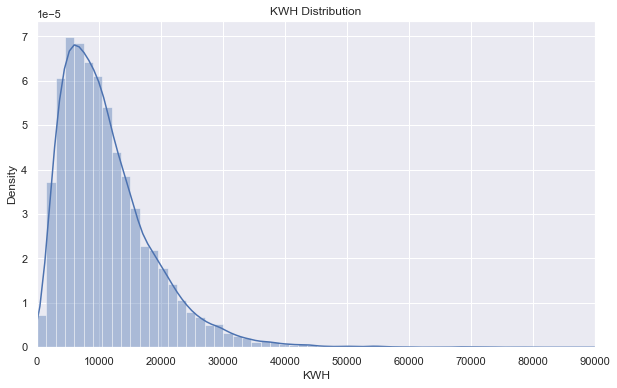

In [159]:
fig, ax = plt.subplots(figsize=[10,6])
ax.set_xlim(0,90000)
sns.distplot(df['KWH'],ax=ax, bins=100).set(title = 'KWH Distribution')

It can be seen from the graph above that the distribution of target variable is positively skewed. This means that the outliers of the distribution are further towards the right. Let's create box plot (i.e. box and whisker diagram) for our target variable to see the range of values in a more intutive way

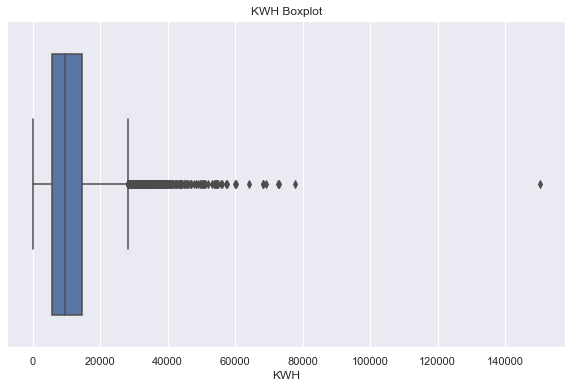

In [160]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.boxplot(x=df['KWH']).set(title = 'KWH Boxplot')

As previously observed from the distribution graph of target variable, we can clearly see in the box plot above that almost all the observations for energy consumption are under 80,000 KWH except for just one extreme outlier value above KWH 140,000. We will take care of the outlier values in the data preprocessing section

In the distribution plot above for our target variable, we observed that the distribution was right or positively skewed. Hence, to tackle issue of skewness, let's apply the log transformation on our target variable

[Text(0.5, 1.0, 'KWHlog Distribution')]

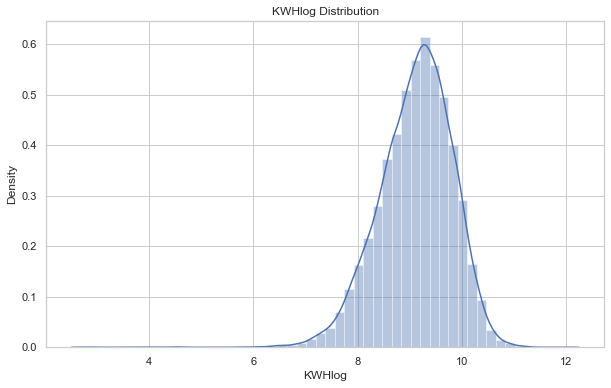

In [411]:
df['KWHlog'] = np.log(df['KWH'])
fig, ax = plt.subplots(figsize=[10,6])
sns.distplot(df['KWHlog'],ax=ax).set(title = 'KWHlog Distribution')

We can observe from the distribution graph above that log transformation has brought the distribution close to normal or beel shape curve. In other words, we can say that the log transformation reduced the skeness of our original data and hence the statistical analysis results from log transformed data will be more accurate or valid.

To extract important predictors of our target variable 'KWH', we will find correlation between target variable 'KWH' and all predictor variables and filter the predictor variables by keeping the threshold correlation value of abs(0.4), meaning the predictor variables with a correlation of abs(0.4) with target variable 'KWH' will be shown.

In [419]:
corr = df.corr()
corr_target = abs(corr['KWH'])
relevant_features = corr_target[corr_target>0.4]
relevant_features.sort_values(ascending = False)
print("{} features were found to have correlation value of 0.4 or more with our target variable 'KWH'".format(len(relevant_features)))
print('----------------------------------------------------------------------------------------')
print('These features are: \n{}'.format(list(corr_target.index[corr_target>0.4])))

33 features were found to have correlation value of 0.4 or more with our target variable 'KWH'
----------------------------------------------------------------------------------------
These features are: 
['BEDROOMS', 'NCOMBATH', 'TOTROOMS', 'ACROOMS', 'TOTHSQFT', 'TOTCSQFT', 'KWH', 'KWHSPH', 'KWHCOL', 'KWHWTH', 'KWHRFG', 'KWHOTH', 'BTUEL', 'BTUELSPH', 'BTUELCOL', 'BTUELWTH', 'BTUELRFG', 'BTUELOTH', 'DOLLAREL', 'DOLELSPH', 'DOLELCOL', 'DOLELWTH', 'DOLELRFG', 'DOLELOTH', 'TOTALBTUCOL', 'TOTALBTURFG', 'TOTALBTUOTH', 'TOTALDOL', 'TOTALDOLCOL', 'TOTALDOLWTH', 'TOTALDOLRFG', 'TOTALDOLOTH', 'KWHlog']


Let's now check which are the top 20 predictors for tagret variable 'KWH' on the basis of the results of correlation analysis

In [420]:
relevant_features.sort_values(ascending = False)[:21]

KWH            1.000000
BTUEL          1.000000
KWHlog         0.889017
BTUELOTH       0.880403
KWHOTH         0.880403
DOLLAREL       0.868712
DOLELOTH       0.702251
TOTALBTUOTH    0.676108
TOTALDOLOTH    0.655742
BTUELCOL       0.655104
KWHCOL         0.655104
TOTALBTUCOL    0.655103
TOTALBTURFG    0.638621
KWHRFG         0.638621
BTUELRFG       0.638621
TOTALDOL       0.627922
TOTALDOLCOL    0.601628
DOLELCOL       0.601626
KWHWTH         0.585656
BTUELWTH       0.585656
DOLELWTH       0.514613
Name: KWH, dtype: float64

Let's plot the 'KWH' correlation matrix

<AxesSubplot:>

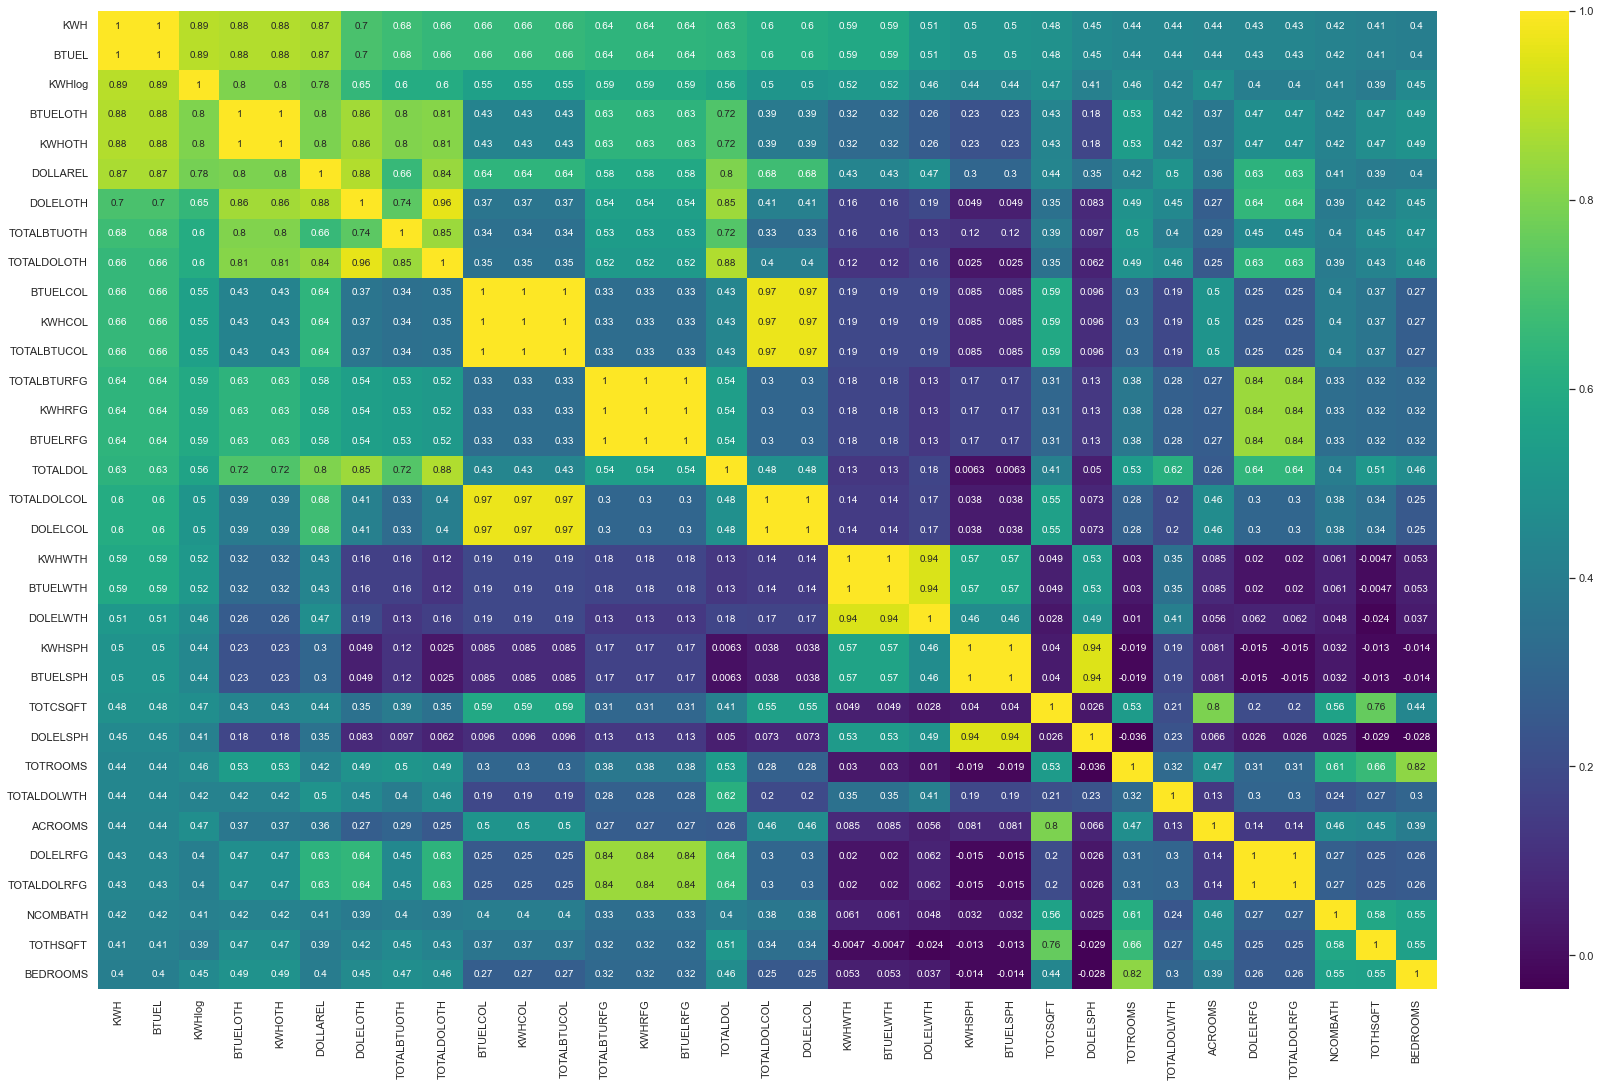

In [421]:
k = 33
cols = df.corr().nlargest(k, 'KWH')['KWH'].index
cm = df[cols].corr()
plt.figure(figsize=(30,18))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Following may be observed from the above graph:
- green and yellow color represents strong positive correlation whereas blue and purple color represents very weak positive or negative correlation
- KWH has moderate to strong positive correlation (> 0.4) with all top 32 important predictors
- Many predictor variables have high correlation with each other (such as BTUELCOL, KWHCOL, TOTALBTUCOL), thus indicating the presence of multicollinearity among predictor variables/features. We will explore collinearity among predictor features in detail in the feature selection section

Let's now explore how does these predictor variables affect the target variable 'KWH' by graphing a scatter plot between target variable and a few predictor variables

**How does 'BTUEL' i.e. Electricity Usage in BTU relates with the target variable 'KWH'?**

Text(0, 0.5, 'Electricity Usage in KWH')

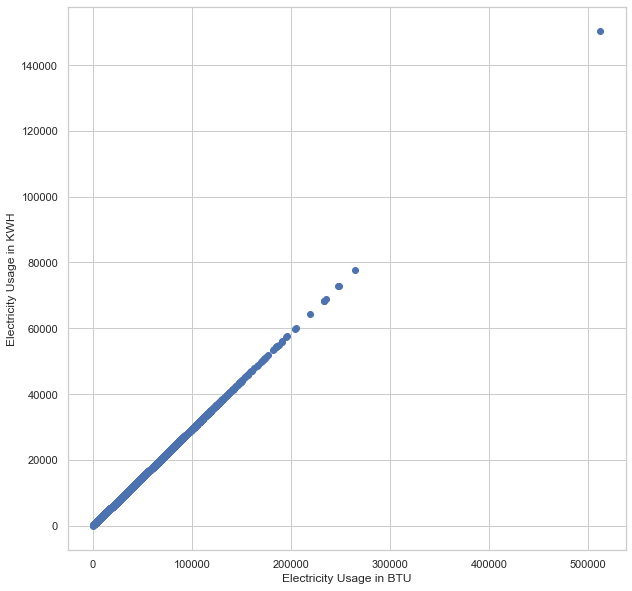

In [432]:
plt.figure(figsize=(10,10))
plt.scatter(x='BTUEL',y='KWH',data=df)
ax.set_ylim(ymin=0)
plt.xlabel('Electricity Usage in BTU')
plt.ylabel('Electricity Usage in KWH')

We can see from the scatterplot that KWH and BTUEL is perfectly correlated. Infact, it is a duplicate variable indicating total electricity usage in different units, thousand BTU in variable BTUEL and kilowatt-hours in variable 'KWH'. There are few features in the RECS dataset which are actually either duplicates or calculated by summing up the one or more predictor features. These are as follows:

- KWH = KWHSPH + KWHCOL + KWHWTH + KWHRFG + KWHOTH<br>
- BTUEL = BTUELSPH + BTUELCOL + BTUELWTH + BTUELRFG + BTUELOTH<br>
- DOLLAREL = DOLELSPH + DOLELCOL + DOLELWTH + DOLELRFG + DOLELOTH<br>
- CUFEETNG = CUFEETNGSPH + CUFEETNGWTH + CUFEETNGOTH<br>
- BTUNG = BTUNGSPH + BTUNGWTH + BTUNGOTH<br>
- DOLLARNG = DOLNGSPH + DOLNGWTH + DOLNGOTH<br>
- GALLONLP = GALLONLPSPH + GALLONLPWTH + GALLONLPOTH<br>
- BTULP = BTULPSPH + BTULPWTH + BTULPOTH<br>
- DOLLARLP = DOLLPSPH	+ DOLLPWTH + DOLLPOTH<br>
- GALLONFO = GALLONFOSPH + GALLONFOWTH + GALLONFOOTH<br>
- BTUFO = BTUFOSPH + BTUFOWTH + BTUFOOTH<br>
- DOLLARFO = DOLFOSPH + DOLFOWTH + DOLFOOTH<br>
- GALLONKER = GALLONKERSPH + GALLONKERWTH + GALLONKEROTH<br>
- BTUKER = BTUKERSPH + BTUKERWTH + BTUKEROTH<br>
- DOLLARKER = DOLKERSPH + DOLKERWTH + DOLKEROTH<br>
- TOTALBTU = TOTALBTUSPH + TOTALBTUCOL + TOTALBTUWTH + TOTALBTURFG + TOTALBTUOTH<br>
- TOTALDOL = TOTALDOLSPH + TOTALDOLCOL + TOTALDOLWTH + TOTALDOLRFG + TOTALDOLOTH<br>
- TOTALBTUSPH = BTUELSPH + BTUNGSPH + BTULPSPH + BTUFOSPH + BTUKERSPH<br>
- TOTALBTUCOL = BTUELCOL<br>
- TOTALBTUWTH = BTUELWTH + BTUNGWTH + BTULPWTH +  + BTUFOWTH + BTUKERWTH<br>
- TOTALBTURFG = BTUELRFG<br>
- TOTALBTUOTH = BTUELOTH + BTUNGOTH + BTULPOTH + BTUFOOTH + BTUKEROTH<br>
- TOTALDOLSPH = DOLELSPH + DOLNGSPH + DOLLPSPH + DOLFOSPH + DOLKERSPH<br>
- TOTALDOLCOL = DOLELCOL<br>
- TOTALDOLWTH = DOLELWTH + DOLNGWTH + DOLLPWTH + DOLFOWTH + DOLKERWTH<br>
- TOTALDOLRFG = DOLELRFG<br>
- TOTALDOLOTH = DOLELOTH + DOLNGOTH + DOLLPOTH + DOLFOOTH + DOLKEROTH<br>


**Now, let's check how does Total Cooled Square Footage (TOTCSQFT), Total heated square footage (TOTHSQFT) and Total Number of Rooms in Housing (TOTROOMS) relates with the target variable 'KWH'?**

Text(0, 0.5, 'Electricity Usage in KWH')

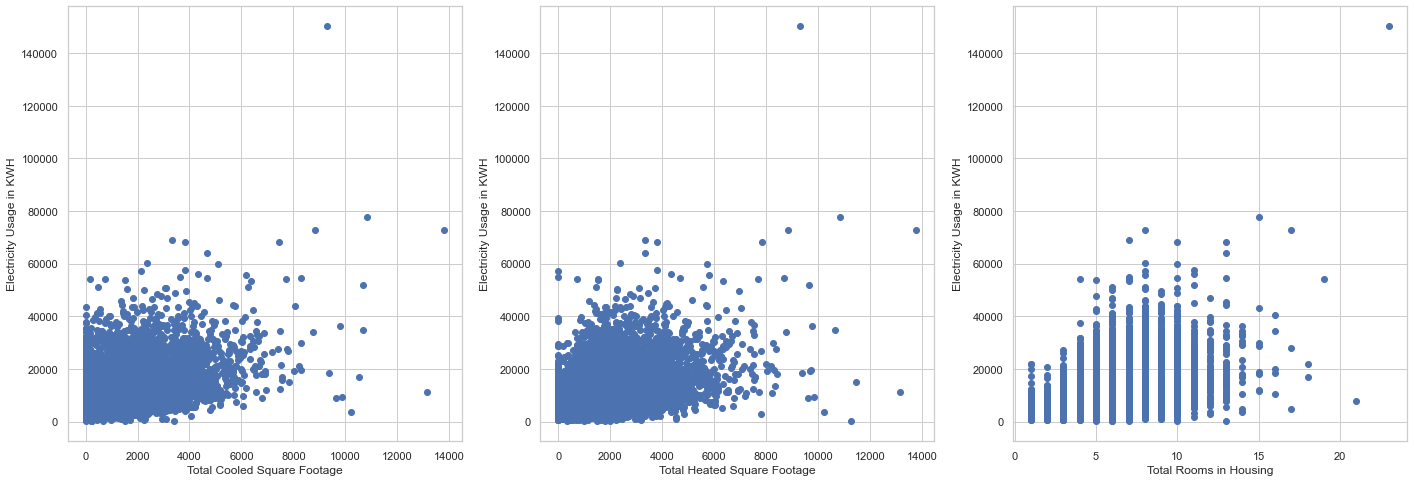

In [430]:
#f = plt.figure(figsize = (10,3))
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
axs[0].scatter(x='TOTCSQFT',y='KWH',data=df)
axs[1].scatter(x='TOTHSQFT',y='KWH',data=df)
axs[2].scatter(x='TOTROOMS',y='KWH',data=df)
axs[0].set_xlabel('Total Cooled Square Footage')
axs[0].set_ylabel('Electricity Usage in KWH')
axs[1].set_xlabel('Total Heated Square Footage')
axs[1].set_ylabel('Electricity Usage in KWH')
axs[2].set_xlabel('Total Rooms in Housing')
axs[2].set_ylabel('Electricity Usage in KWH')

We previosuly found that total cooled square footage, total heated square footage and total rooms in housing had a moderate positive correlation with target variable 'KWH'. The scatter plots above are quite informative and are in-line with the results from correlation analysis. We can see that we do not have one fixed linear relationship across the entire domain of values of total cooled square footage, total heated square footage and total rooms in housing.

<a id="46"></a>
#### f. Detect Outliers and Anomalies

Previously, in the summary statistics section, we found that the mean value was different from the median value for the features HDD65, CDD65, HDD30YR, CDD30YR, TOTSQFT, KWH, CDD80, OA_LAT. In addition, we found a large difference in the 75th percentile and maximum value for these features. These observations indicates the presence of potential outlier values in these features. Let's check each of these feature for outliers using box plot (i.e. box and whisker diagram)

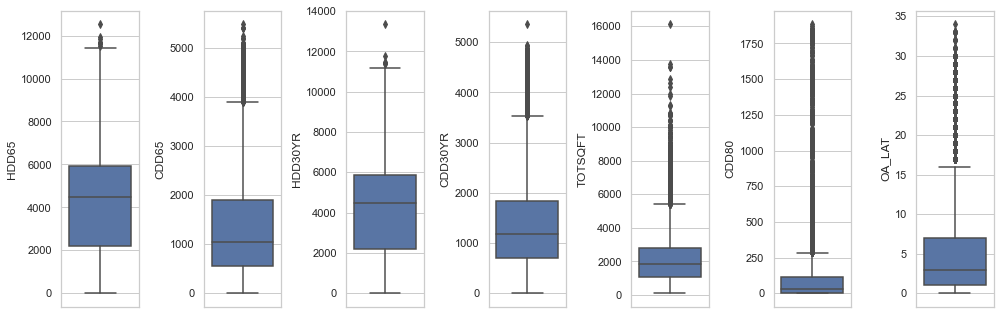

In [288]:
outl_cols = ['HDD65', 'CDD65', 'HDD30YR', 'CDD30YR', 'TOTSQFT', 'CDD80', 'OA_LAT']
number_of_columns=len(outl_cols)
number_of_rows = len(outl_cols)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(outl_cols)):
    plt.subplot(round(number_of_rows + 1),number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y = df[outl_cols[i]],orient='h')
    plt.tight_layout()

We can see from the box plot above that almost all the features shows outliers present in the dataset. Let's now check the linearity of the variables by plotting distribution graph and look for skewness of features using Kernel density estimate (kde)

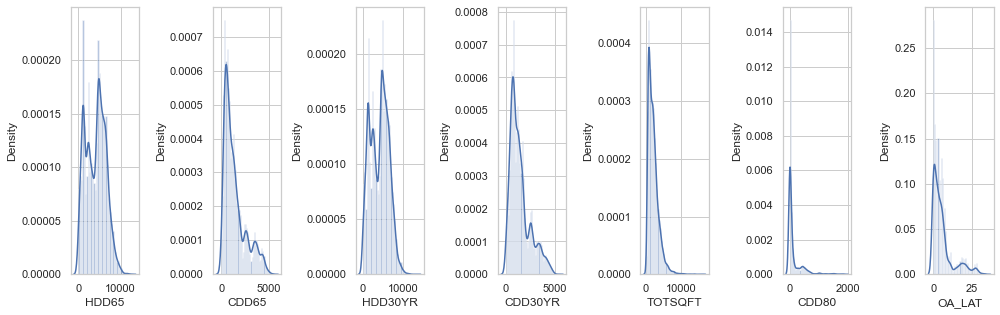

In [291]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(outl_cols)):
    plt.subplot(round(number_of_rows + 1),number_of_columns,i+1)
    sns.distplot(df[outl_cols[i]],kde=True) 
    plt.tight_layout()

All the predictor variables depicted in kde graph above are right skewed/positively skewed

In the [Check for Missing Values](#d-check-for-missing-values) section, we found 72 predictor features that had NA i.e. 'Not Applicable' values in more than 95% of the observations. Let's now check whther these 72 features correlate with the target variable 'KWH' or not

In [327]:
target_var = 'KWH'
feature_target_corr = {}
for col in list(na_col_names.values):
    feature_target_corr[col + '-' + target_var] = round(scipy.stats.spearmanr(df[col], df[target_var])[0],2)
print("Predictor Feature vs Target Variable Correlations")
print(feature_target_corr)

Predictor Feature vs Target Variable Correlations
{'ORIG1FAM-KWH': -0.1, 'LOOKLIKE-KWH': -0.08, 'TYPEHUQ4-KWH': 0.06, 'PCTBSTCL-KWH': 0.08, 'FINATTRMS-KWH': 0.03, 'ATTCHT2-KWH': 0.02, 'PCTATTHT-KWH': 0.01, 'ATTCCL2-KWH': 0.04, 'PCTATTCL-KWH': 0.03, 'STGRILA-KWH': 0.03, 'HELPFRIY-KWH': -0.01, 'TYPERFR3-KWH': 0.13, 'SIZRFRI3-KWH': 0.13, 'REFRIGT3-KWH': 0.13, 'MONRFRI3-KWH': 0.13, 'AGERFRI3-KWH': 0.13, 'ESFRIG3-KWH': 0.08, 'HELPFRZY-KWH': -0.0, 'UPRTFRZR2-KWH': 0.11, 'SIZFREEZ2-KWH': 0.11, 'FREEZER2-KWH': 0.11, 'AGEFRZR2-KWH': 0.11, 'HELPDWY-KWH': 0.03, 'HELPCWY-KWH': 0.01, 'PCSLEEP3-KWH': 0.11, 'DNTHEAT-KWH': -0.11, 'EQUIPNOHEAT-KWH': -0.09, 'FUELNOHEAT-KWH': -0.09, 'HELPHTY-KWH': 0.05, 'FURNFUEL-KWH': 0.06, 'RADFUEL-KWH': -0.02, 'PIPEFUEL-KWH': -0.0, 'RMHTFUEL-KWH': 0.03, 'HSFUEL-KWH': 0.04, 'RNGFUEL-KWH': -0.0, 'DIFFUEL-KWH': 0.02, 'HELPWHY-KWH': 0.02, 'H2OTYPE2-KWH': 0.15, 'FUELH2O2-KWH': 0.15, 'WHEATSIZ2-KWH': 0.15, 'WHEATAGE2-KWH': 0.15, 'COOLTYPENOAC-KWH': -0.1, 'DUCTS-KWH': 0.04, 

Spearman correlation coefficient values between target variable 'KWH' and 72 predictor features reveal low to negligible correlation. We could have employed imputation technique to address these 72 features, however, we can drop them due to high missing values i.e. 'Not Applicable' values and evidence of negligible correlation suggesting that the set of these features have negligible amount of predictive power over the outcome variable. Hence, these features will be removed in data preprocessing section

<a id="47"></a>
#### g. Explore Additional Predictor Variables

Let's now explore the relationship between target variable 'KWH' and categorical features 'METROMICRO', 'UR' and 'IECC_Climate_Pub' using box plots

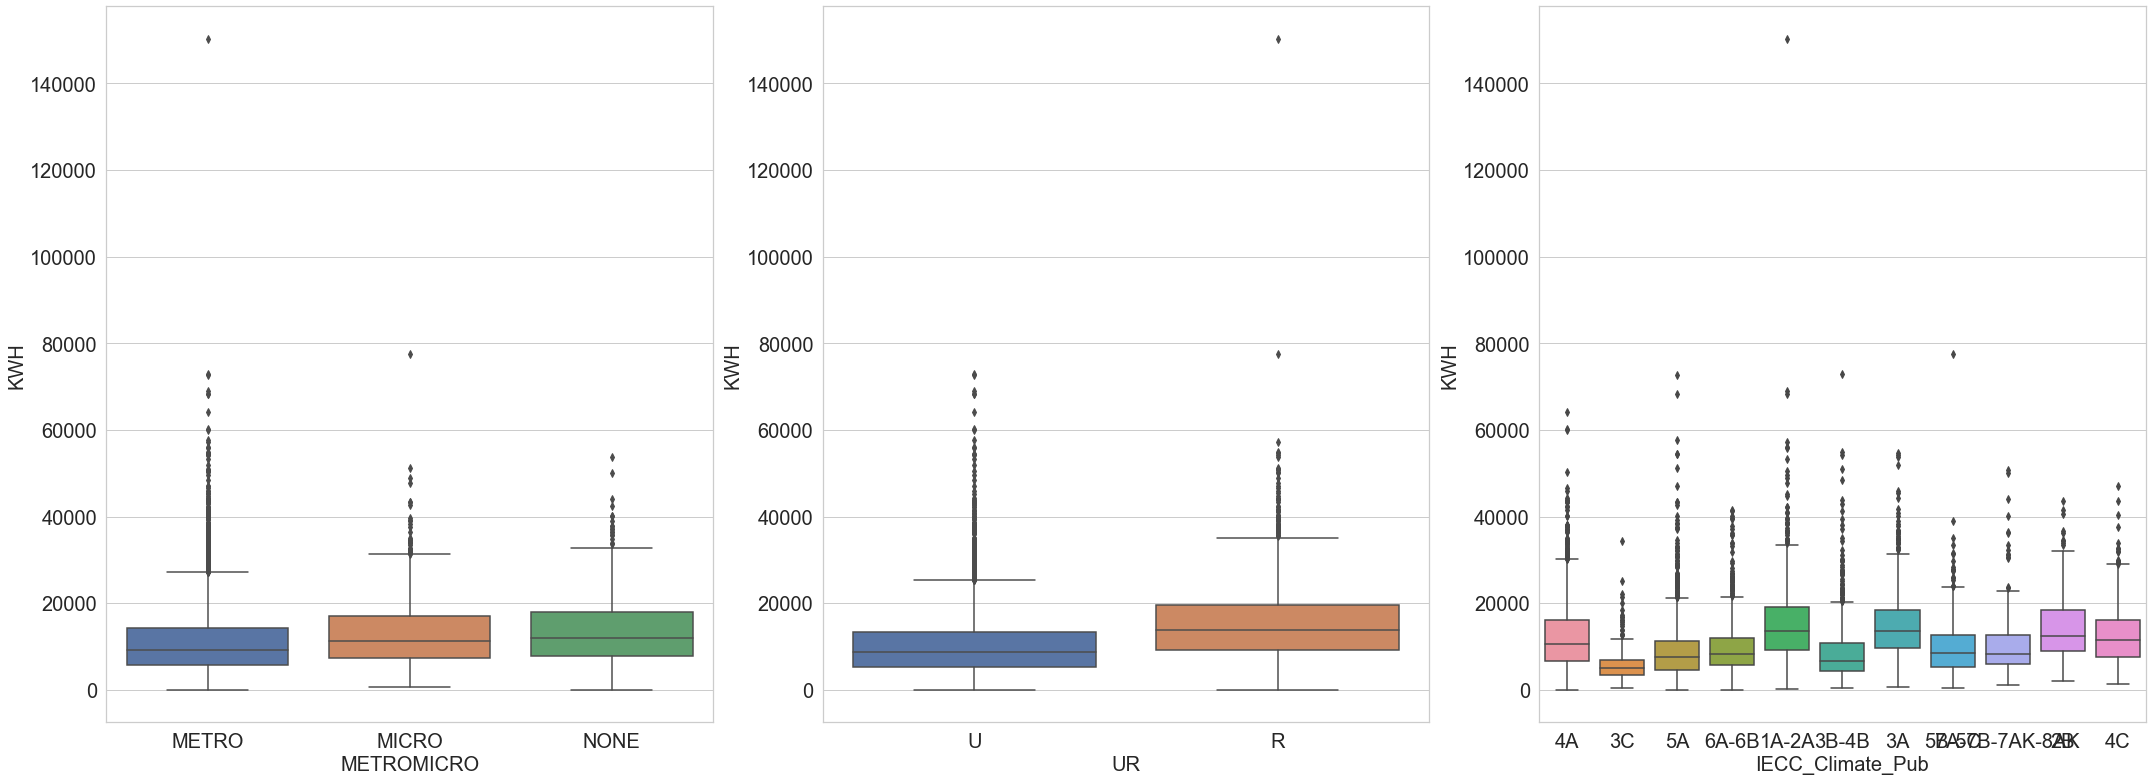

In [357]:
number_of_columns=len(cat_features_remaining)
number_of_rows = len(cat_features_remaining)-1/number_of_columns
plt.figure(figsize=(10*number_of_columns, 16*number_of_rows))
for i in range(0,len(cat_features_remaining)):
    plt.subplot(round(number_of_rows + 1),number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(x = df[cat_features_remaining[i]], y ='KWH', data = df)
    plt.xlabel(cat_features_remaining[i], size = 20)
    plt.ylabel('KWH', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.tight_layout()

We can observe in the box plots above that all the categories of categorical features has energy consumption value under KWH 80,000 except for just one extreme outlier value above KWH 140,000. We will take care of the outlier values in the data preprocessing section

We will convert the categorical values of a feature into dummy variables using a technique called One hot encoding in the data preprocessing section. It is to be noted that incase the cardinality of a particular categorical feature is very high, then using one-hot encoding is not recommended as it might lead to a curse of dimensionality. However, in our dataset we have three categorical features with feature 'IECC_Climate_Pub' having the maximum unique feature values of 11

Let's now explore how some of the housing characterstics, usage patterns and household demographics features are related with the target variable 'KWH' i.e. Total Electricity usage in KWH. The following features under housing characterstics, usage patterns and household demographics will be explored in-depth to uncover underlying patterns in the dataset:
- **Housing Characterstics:** type of housing unit (TYPEHUQ), year housing unit was built (YEARMADERANGE), total number of rooms in housing (TOTROOMS)
- **Usage Patterns:** frequency of clothes dryer use (DRYRUSE), frequency of oven use (OVENUSE), frequency of dishwasher use (DWASHUSE)
- **Household Demographics :** number of household members (NHSLDMEM), gross household income (MONEYPY)

It may be noted here that all the features falling under housing characterstics, usgae patters and household demographics are discrete numerical variables i.e. the variables whose values exist in a particular range or are countable in a finite amount of time

**How does Housing Characterstics features relates with the target variable 'KWH'?**

a) Relation Between Type of Housing Unit and Energy Consumption in KWH

Text(0, 0.5, 'KWH')

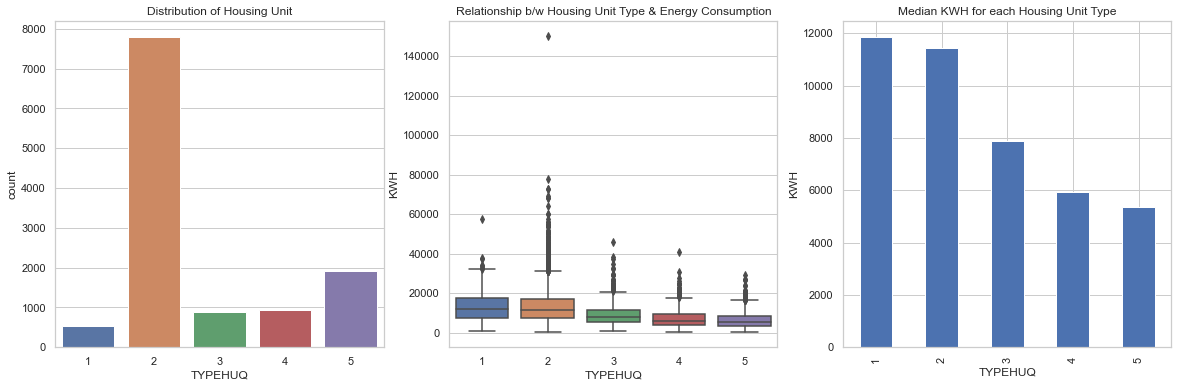

In [453]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.set_style('whitegrid')
ax0 = sns.countplot(x='TYPEHUQ', data = df)
ax0.set_title('Distribution of Housing Unit')
plt.subplot(1,3,2)
ax1 = sns.boxplot(x='TYPEHUQ', y ='KWH', data = df)
ax1.set_title('Relationship b/w Housing Unit Type & Energy Consumption')
plt.subplot(1,3,3)
df.groupby('TYPEHUQ')['KWH'].median().plot.bar() ## plotting the median KWH value for each level/factor of housing unit type
plt.title('Median KWH for each Housing Unit Type')
plt.ylabel('KWH')

Based on the above plots, we can observe the following:
- Housing unit type 2 i.e. Single-Family Detached dominates the data distribution of Housing Unit type (n = ~7800 observations)
- We may observe a clear pattern in the boxplot above that as housing unit type change from Mobile home to single-family home to apartment in building, lesser the energy is consumed
- From the plot 'Median KWH for each Housing Unit type', we can see that feature TYPEHUQ has a direct relation with the target variable

b) Relation Between Year in which Housing Unit was built and Energy Consumption in KWH

Text(0, 0.5, 'KWH')

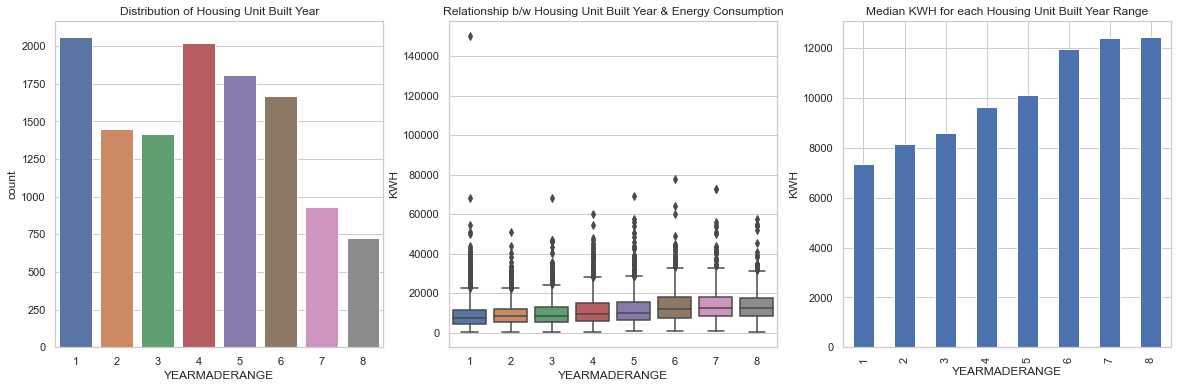

In [454]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.set_style('whitegrid')
ax0 = sns.countplot(x='YEARMADERANGE', data = df)
ax0.set_title('Distribution of Housing Unit Built Year')
plt.subplot(1,3,2)
ax1 = sns.boxplot(x='YEARMADERANGE', y ='KWH', data = df)
ax1.set_title('Relationship b/w Housing Unit Built Year & Energy Consumption')
plt.subplot(1,3,3)
df.groupby('YEARMADERANGE')['KWH'].median().plot.bar()
plt.title('Median KWH for each Housing Unit Built Year Range')
plt.ylabel('KWH')

Based on the above plots, we can observe the following:
- We can see from the barplot that Housing Unit Built Year has data well-distributed across different levels/range of built year
- We may see a clear pattern in the boxplot above that most recently the housing unit was built, more energy consumption can be observed
- 'Median KWH for each housing unit built year range' graph observation is in-line with boxplot results indicating that feature YEARMADERANGE indeed has a direct relation with the target variable

c) Relation Between Total Rooms in  Housing and Energy Consumption in KWH

Text(0, 0.5, 'KWH')

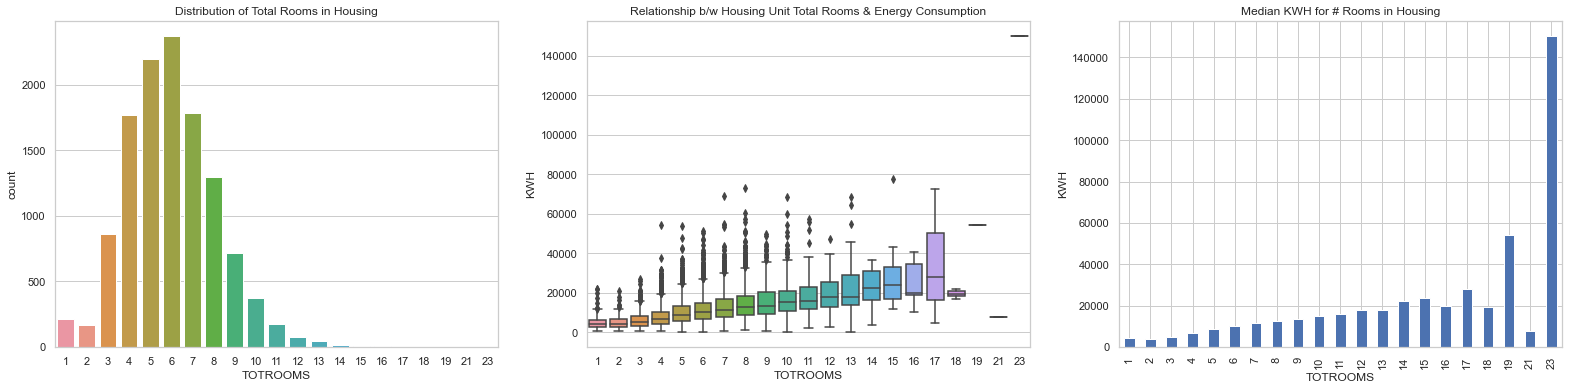

In [448]:
plt.figure(figsize=(27,6))
plt.subplot(1,3,1)
sns.set_style('whitegrid')
ax0 = sns.countplot(x='TOTROOMS', data = df)
ax0.set_title('Distribution of Total Rooms in Housing')
plt.subplot(1,3,2)
ax1 = sns.boxplot(x='TOTROOMS', y ='KWH', data = df)
ax1.set_title('Relationship b/w Housing Unit Total Rooms & Energy Consumption')
plt.subplot(1,3,3)
df.groupby('TOTROOMS')['KWH'].median().plot.bar()
plt.title('Median KWH for # Rooms in Housing')
plt.ylabel('KWH')

Based on the above plots, we can observe the following:
- Most of the Housing units typically have less than 15 rooms in total. Only few of the housings have more than or equal to 15 rooms in total. Hence, we could combine these levels together and create a new one 'more than 14 rooms'. We will take care of this in data preprocessing section
- We may see a clear pattern in the boxplot above that more the number of rooms in the housing, more the energy consumption is
- Similarly, the median KWH plot also show that as number of rooms in housing increases, the energy consumption increases as well, indicating that feature TOTROOMS has a direct relation with the target variable

**How does Appliance Usage Pattern features relates with the target variable 'KWH'?**

a) Relation Between Frequency of Clothes Dryer Use and Energy Consumption in KWH

Text(0, 0.5, 'KWH')

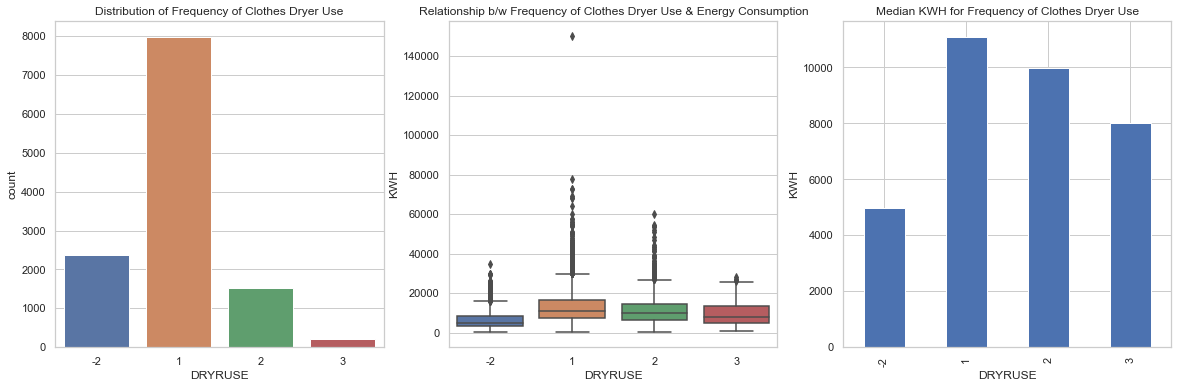

In [449]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.set_style('whitegrid')
ax0 = sns.countplot(x='DRYRUSE', data = df)
ax0.set_title('Distribution of Frequency of Clothes Dryer Use')
plt.subplot(1,3,2)
ax1 = sns.boxplot(x='DRYRUSE', y ='KWH', data = df)
ax1.set_title('Relationship b/w Frequency of Clothes Dryer Use & Energy Consumption')
plt.subplot(1,3,3)
df.groupby('DRYRUSE')['KWH'].median().plot.bar()
plt.title('Median KWH for Frequency of Clothes Dryer Use')
plt.ylabel('KWH')

Based on the above plots, we can observe the following:
- Most of the households use clothes dryer everytime they wash clothes (depicted by factor/level value 1. Note that factor/level value 3 indicates infrequent use of clothes dryer)
- We can observe a clear pattern in the boxplot above that more frequently a household use clothes dryer, more is the energy consumption
- The median KWH plot results are in-line with boxplot results, indicating that more frequently household use clothes dryer, more is the median value of energy consumption. Thus, feature DRYRUSE has a direct relation with the target variable

b) Relation Between Frequency of Oven Use and Energy Consumption in KWH

Text(0, 0.5, 'KWH')

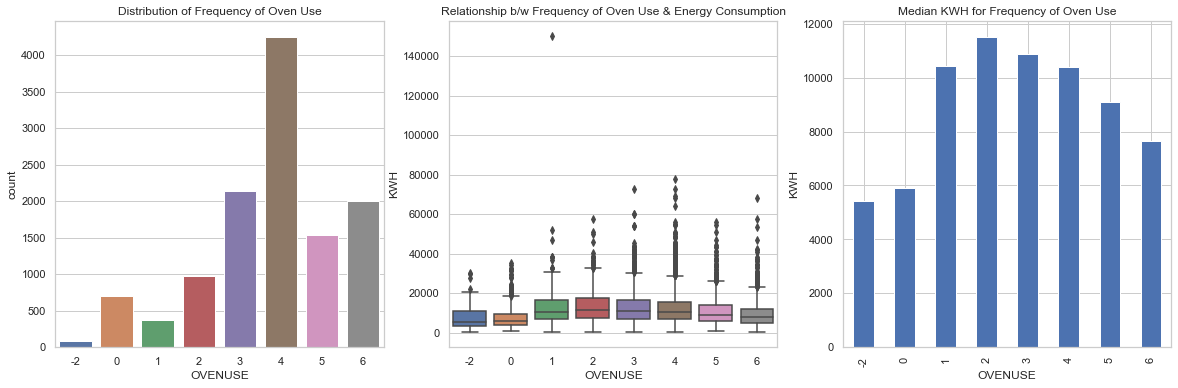

In [450]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.set_style('whitegrid')
ax0 = sns.countplot(x='OVENUSE', data = df)
ax0.set_title('Distribution of Frequency of Oven Use')
plt.subplot(1,3,2)
ax1 = sns.boxplot(x='OVENUSE', y ='KWH', data = df)
ax1.set_title('Relationship b/w Frequency of Oven Use & Energy Consumption')
plt.subplot(1,3,3)
df.groupby('OVENUSE')['KWH'].median().plot.bar()
plt.title('Median KWH for Frequency of Oven Use')
plt.ylabel('KWH')

Based on the above plots, we can observe the following:
- Majority of the households use the oven 'few times a week' (depicted by factor/level value 1. Note that factor/level value 1 indicates use of oven three or four times a day)
- Contrary to the results of barplot, from the boxplot and median KWH plot, we can observe that most energy consumption was from the households who were using oven 'two times a day' (depicted by higher median value for factor/level value 2 of feature OVENUSE)

c) Relation Between Frequency of Dishwasher Use and Energy Consumption in KWH

Text(0, 0.5, 'KWH')

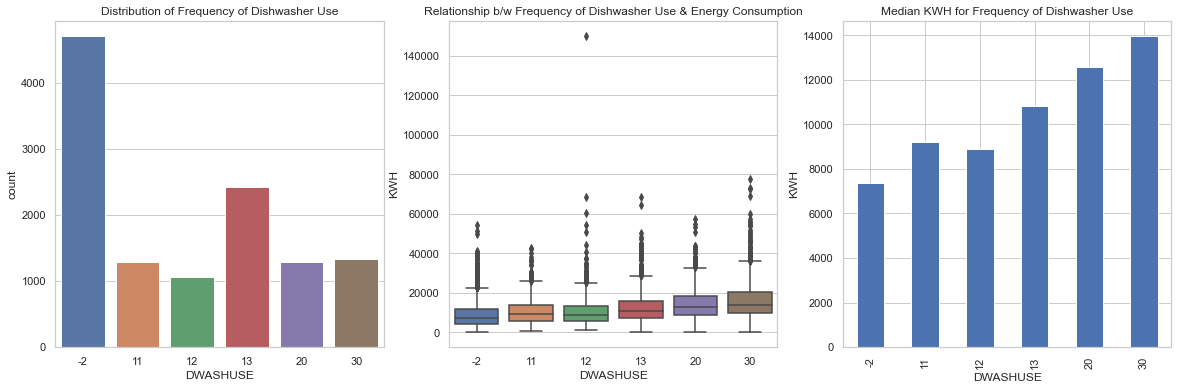

In [452]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.set_style('whitegrid')
ax0 = sns.countplot(x='DWASHUSE', data = df)
ax0.set_title('Distribution of Frequency of Dishwasher Use')
plt.subplot(1,3,2)
ax1 = sns.boxplot(x='DWASHUSE', y ='KWH', data = df)
ax1.set_title('Relationship b/w Frequency of Dishwasher Use & Energy Consumption')
plt.subplot(1,3,3)
df.groupby('DWASHUSE')['KWH'].median().plot.bar()
plt.title('Median KWH for Frequency of Dishwasher Use')
plt.ylabel('KWH')

Based on the above plots, we can observe the following:
- From the barplot, we may observe that most of the households use their dishwashers '2 or 3 times a week' (depicted by factor/level value 13. Note that factor/level value 11 indicates use of dishwasher less than once a week and factor/level 30 indicates using dishwasher at least once each day)
- We can observe a clear pattern in the boxplot as well as median KWH plot above that more frequently household use dishwasher, more is the energy consumption. Thus, feature DWASHUSE has a direct relation with the target variable

**How does Household Demographic features relates with the target variable 'KWH'?**

a) Relation Between Total Members in Household and Energy Consumption in KWH

Text(0, 0.5, 'KWH')

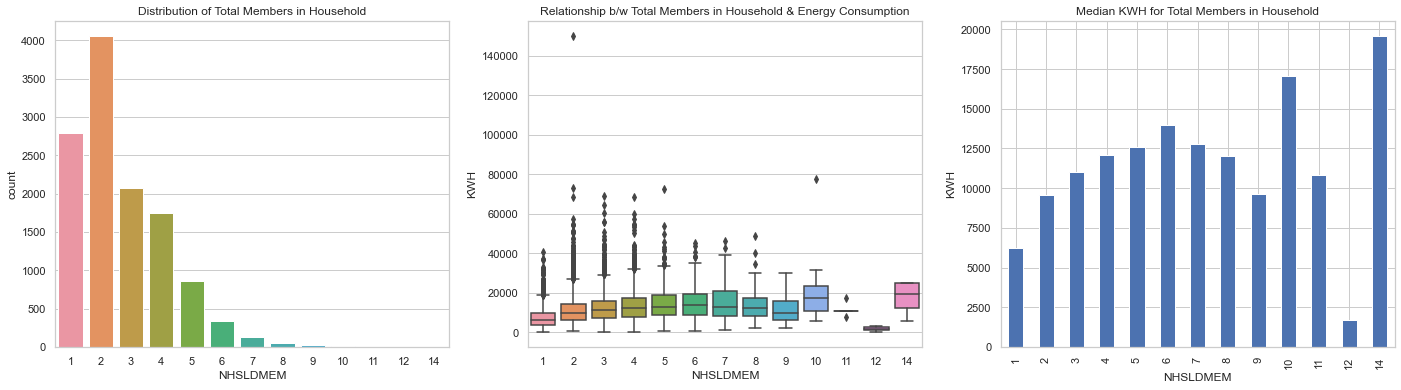

In [455]:
plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.set_style('whitegrid')
ax0 = sns.countplot(x='NHSLDMEM', data = df)
ax0.set_title('Distribution of Total Members in Household')
plt.subplot(1,3,2)
ax1 = sns.boxplot(x='NHSLDMEM', y ='KWH', data = df)
ax1.set_title('Relationship b/w Total Members in Household & Energy Consumption')
plt.subplot(1,3,3)
df.groupby('NHSLDMEM')['KWH'].median().plot.bar()
plt.title('Median KWH for Total Members in Household')
plt.ylabel('KWH')

Based on the results of above bar plot, we can observe that very less number of households had more than 6 members in the household. The barplot and median KWH plot doesn't indicate a clear pattern of relationship between total members in household and energy consumption. However, if combine factors/levels 6-14 of feature NHSLDMEM together and create a new one 'more than 5 members, then we might observe a pattern indicating that as members in the household increases, the energy consumption increases as well. We will combine the levels in data preprocessing section

b) Relation Between Gross Household Income and Energy Consumption in KWH

Text(0, 0.5, 'KWH')

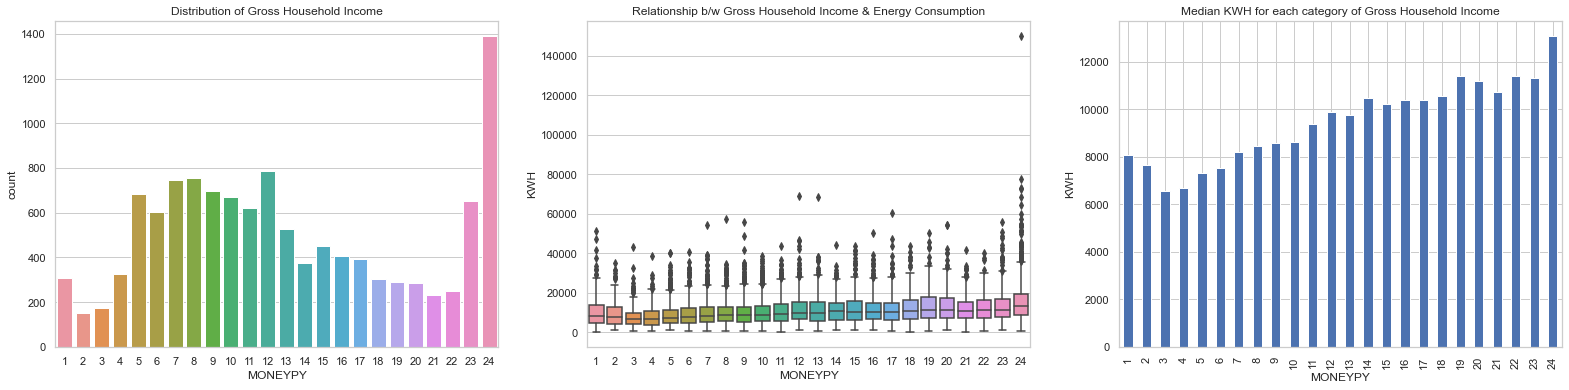

In [457]:
plt.figure(figsize=(27,6))
plt.subplot(1,3,1)
sns.set_style('whitegrid')
ax0 = sns.countplot(x='MONEYPY', data = df)
ax0.set_title('Distribution of Gross Household Income')
plt.subplot(1,3,2)
ax1 = sns.boxplot(x='MONEYPY', y ='KWH', data = df)
ax1.set_title('Relationship b/w Gross Household Income & Energy Consumption')
plt.subplot(1,3,3)
df.groupby('MONEYPY')['KWH'].median().plot.bar()
plt.title('Median KWH for each category of Gross Household Income')
plt.ylabel('KWH')

Based on the results of above bar plot, we can observe that very less number of households had less than $10,000 as their gross household income (NOTE: factor/level 5 indicates gross household income of $10,000 to $14,999). The barplot and median KWH plot indicates higher energy consumption for households with gross income less than $2,500 (depicted by factor/level 1) as compared to households with gross income between $2,500 to $19,999 (i.e. factor/level 2 to 6). This could be because of free electricity subsidy programs by state and federal government. However, for households with gross income greater than $20,000, a clear pattern can be observed that as gross income of a household increase overall, the energy consumption increases as well

<a id="5"></a>
### 5. Data Transformation and Preprocessing

<a id="51"></a>
#### a. Data Transformation

<a id="511"></a>
**i. Combining/Merging Predictor Features**

Let's create a couple of new features by combining some of the existing features. These new features alongwith the existing ones will be later analyzed in feature selection section to determine whether keeping these features would help to understand our target variable better.

Here's the list of new features that will be created in this section:
- **TV Equipment Features:** We will merge all the TV equipment related features (such as TV, VCR, DVD, game console, home theatre, cable box and set-top box) and create a new feature called ALLTVFTR. The features that we will combine are ['TVCOLOR', 'CABLESAT1', 'COMBODVR1','DVR1', 'DIGITSTB1', 'PLAYSTA1', 'COMBOVCRDVD1', 'VCR1', 'DVD1', 'TVAUDIOSYS1', 'OTHERSTB1', 'CABLESAT2', 'COMBODVR2', 'DVR2', 'DIGITSTB2', 'PLAYSTA2', 'COMBOVCRDVD2', 'VCR2', 'DVD2', 'TVAUDIOSYS2', 'OTHERSTB2', 'CABLESAT3', 'COMBODVR3', 'DVR3', 'DIGITSTB3', 'PLAYSTA3', 'COMBOVCRDVD3', 'VCR3', 'DVD3', 'TVAUDIOSYS3', 'OTHERSTB3']

- **Office Equipment Features:** We will merge all the Office equipment related features (such as computer, monitor, printer, fax machine and cope machine) and create a new feature called ALLOFFFTR. The features that we will combine are ['NUMPC', 'PCPRINT', 'FAX', 'COPIER', 'MONITOR1', 'MONITOR2', 'MONITOR3']

- **Telephone Features:** We will merge all the telephone equipment related features (such as cordless telephone and answering machine) and create a new feature called ALLTELFTR. The features that we will combine are ['NOCORD', 'ANSMACH']

Let's just first start by replacing -2 value in all the above mentioned features to 0. Changing -2 to 0 in above features will ensure that we are not subtracting any value during the merging of these features. NOTE: None of the telephone features has -2 factor/level


In [458]:
tv_features = ['TVCOLOR', 'CABLESAT1', 'COMBODVR1','DVR1', 'DIGITSTB1', 'PLAYSTA1', 'COMBOVCRDVD1', 'VCR1', 'DVD1', 'TVAUDIOSYS1', 'OTHERSTB1', 'CABLESAT2', 'COMBODVR2', 'DVR2', 
'DIGITSTB2', 'PLAYSTA2', 'COMBOVCRDVD2', 'VCR2', 'DVD2', 'TVAUDIOSYS2', 'OTHERSTB2', 'CABLESAT3', 'COMBODVR3', 'DVR3', 'DIGITSTB3', 'PLAYSTA3', 'COMBOVCRDVD3', 'VCR3', 'DVD3', 
'TVAUDIOSYS3', 'OTHERSTB3']
office_features = ['NUMPC', 'PCPRINT', 'FAX', 'COPIER', 'MONITOR1', 'MONITOR2', 'MONITOR3']
tel_features = ['NOCORD', 'ANSMACH']

for i in tv_features:
    df[i] = df[i].apply(lambda x : x if x != -2 else 0)
df['ALLTVFTR'] = df[tv_features].sum(axis=1)

for i in office_features:
    df[i] = df[i].apply(lambda x : x if x != -2 else 0)
df['ALLOFFFTR'] = df[office_features].sum(axis=1)

df['ALLTELFTR'] = df[tel_features].sum(axis=1)

- Elimination of columns not needed such as columns representing imputation flags

Below are the set of assumptions considered for the data pre-processing work:
1. All columns starting with "Z" are dropped as these columns represent imputation flags
2. It was observed that some of the dataset features are the calculated fields dervied from sum of one or more dataset columns. Some of these dataset features/columns have been mentioned below:
    

Club all electronics into 3 categories TVREL, PCOFFEQUIP, PHONE

In [ ]:
df[df['KWH'] > 30000]['DOEID'].count()